数据集中共有 52 个国家。
数据集中的国家列表如下：
United States
Netherlands
Switzerland
Germany
China
France
United Kingdom
Canada
Australia
Bulgaria
Malaysia
Finland
South Korea
Japan
Taiwan
Italy
Egypt
New Zealand
Belgium
Poland
Hungary
Austria
Lebanon
Denmark
Hong Kong
Colombia
Indonesia
United Arab Emirates
Ecuador
Sweden
India
Czechia
Spain
Pakistan
Brazil
Kenya
Russia
Vietnam
Singapore
Portugal
Türkiye
Ireland
Greece
Ethiopia
Georgia
Norway
Tunisia
Estonia
Israel
South Africa
Slovenia
Lithuania
国家分布（前20名）：
                     数量     百分比
country                        
Germany          175349  14.53%
United States     99673   8.26%
China             61433   5.09%
CA                59860   4.96%
France            59570   4.94%
Japan             43566   3.61%
Czechia           41289   3.42%
Switzerland       38093   3.16%
United Kingdom    36730   3.04%
UK                33701   2.79%
Italy             30671   2.54%
Australia         30241   2.51%
Canada            28326   2.35%
Netherlands       26271 

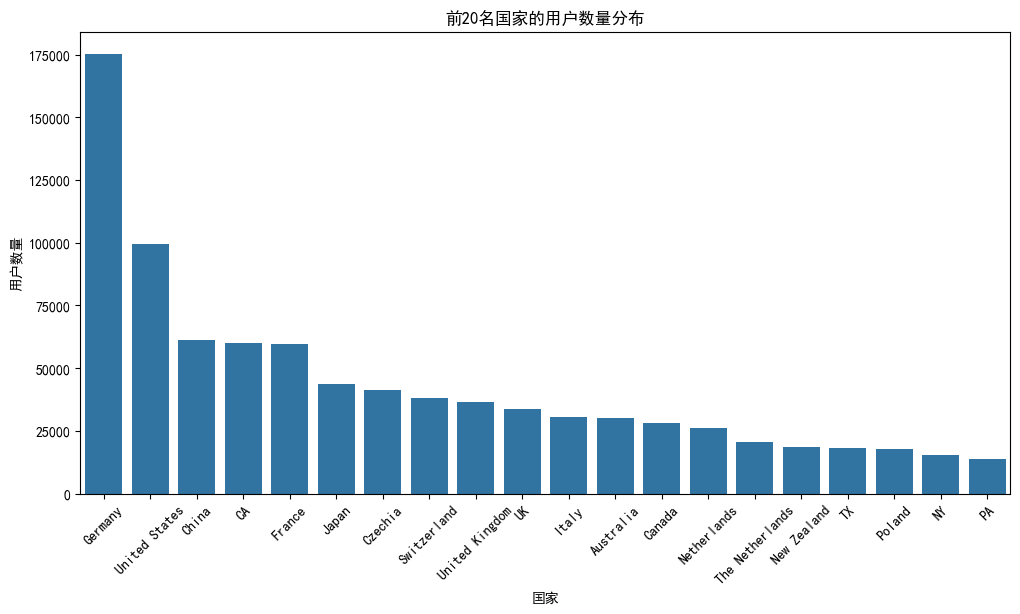

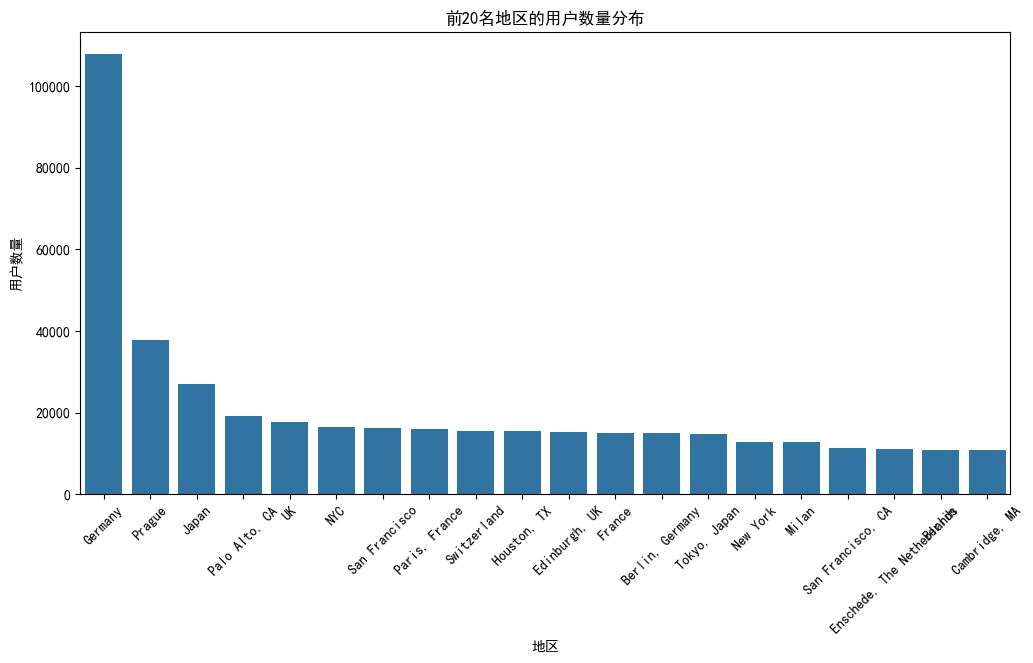

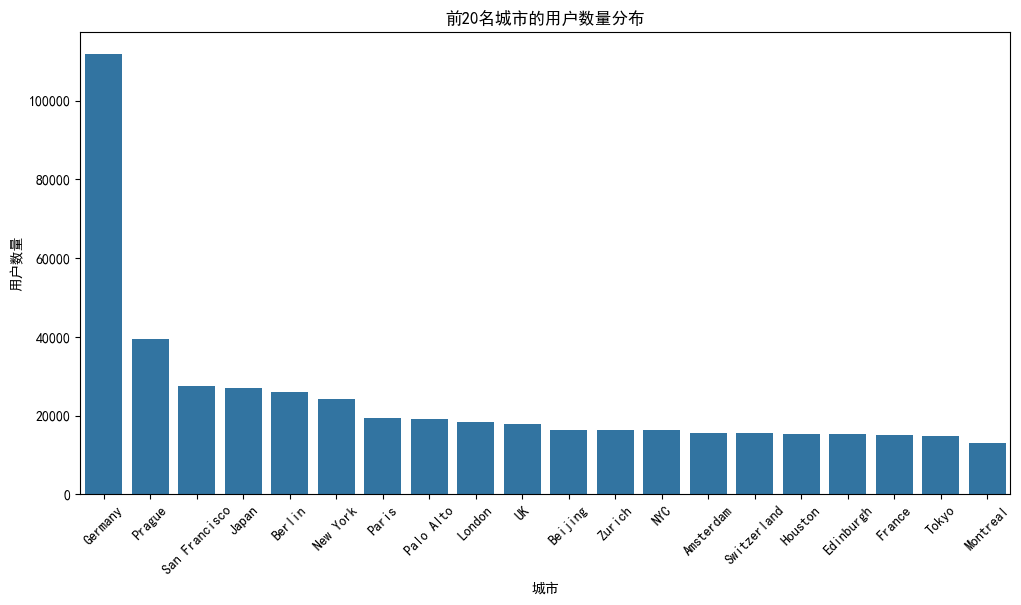

d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8604 (\N{LEFTWARDS WAVE ARROW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


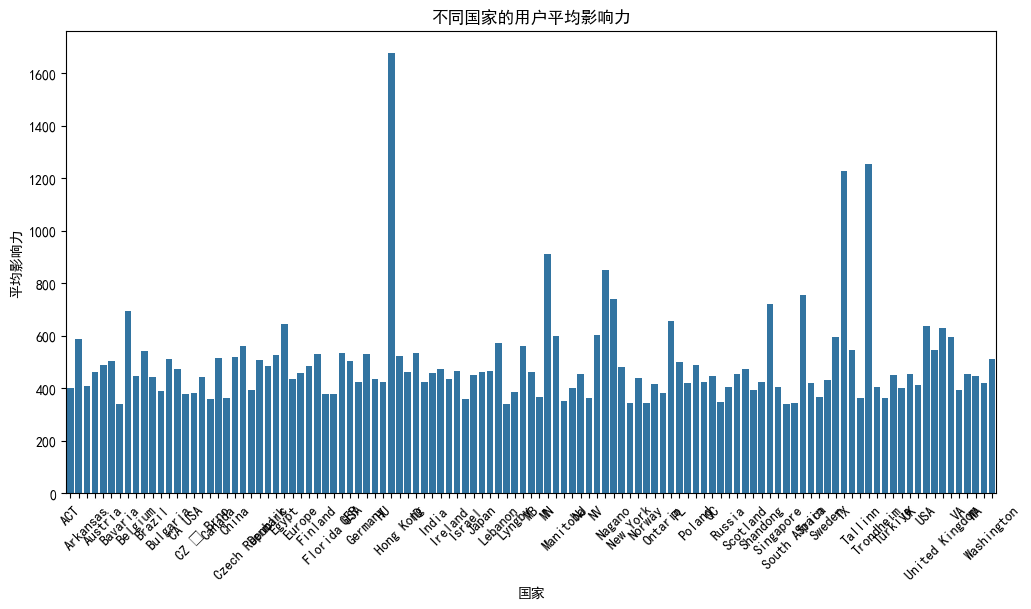

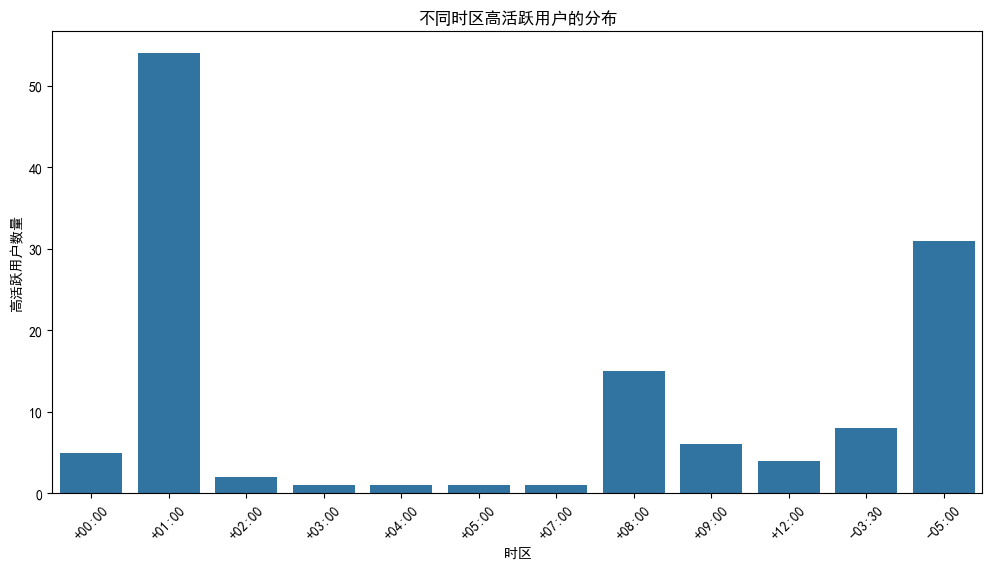

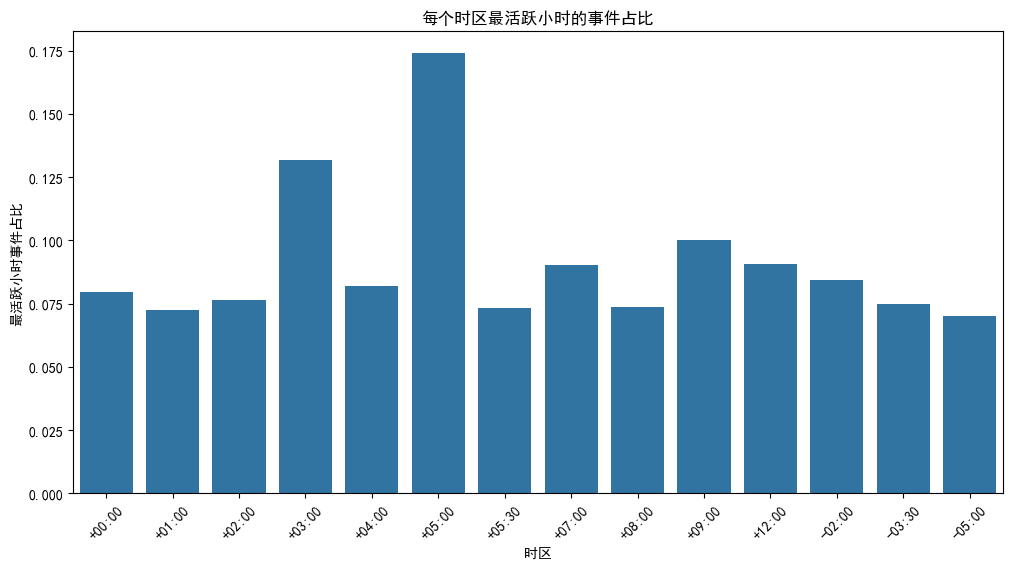

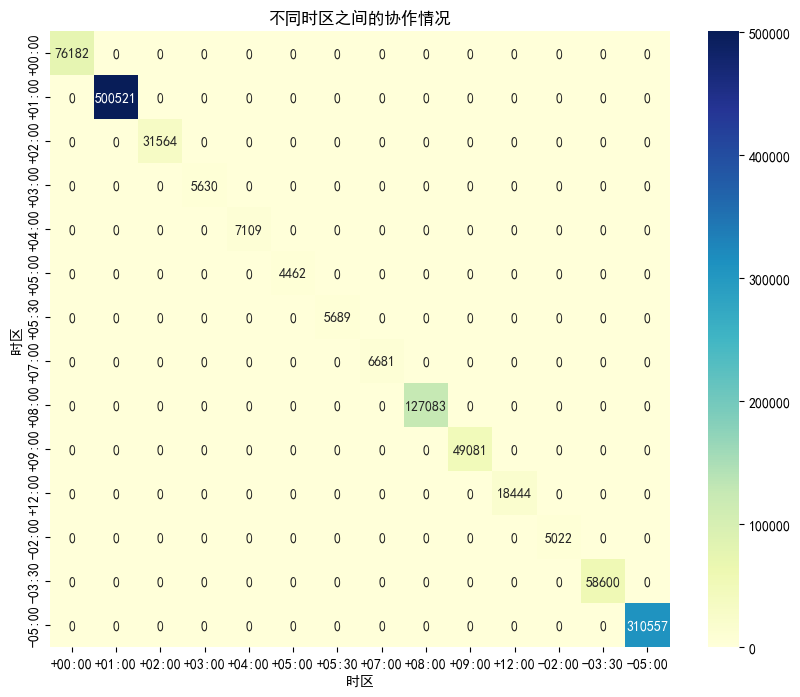

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 设置全局字体为SimHei
font_path = fm.findfont('SimHei')
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

# 合并CSV文件
combined_data = pd.DataFrame()
for i in range(1, 8):
    file_name = f"users_combined_info_500_part_{i}.csv"
    if os.path.exists(file_name):
        data = pd.read_csv(file_name)
        combined_data = pd.concat([combined_data, data], ignore_index=True)

# 处理country列可能存在的缺失值
combined_data = combined_data.dropna(subset=['country'])

# 计算国家数量
num_countries = combined_data['country'].nunique()
print(f"数据集中共有 {num_countries} 个国家。")

# 输出每个国家
countries_list = combined_data['country'].unique().tolist()
print("数据集中的国家列表如下：")
for country in countries_list:
    print(country)

# 定义国家到时区的映射字典
country_timezone_mapping = {
    "United States": ["-05:00", "-06:00", "-07:00", "-08:00"],
    "Netherlands": "+01:00",
    "Switzerland": "+01:00",
    "Germany": "+01:00",
    "China": "+08:00",
    "France": "+01:00",
    "United Kingdom": "+00:00",
    "Canada": ["-03:30", "-04:00", "-05:00", "-06:00", "-07:00", "-08:00", "-09:00", "-10:00"],
    "Australia": ["+08:00", "+09:00", "+09:30", "+10:00", "+10:30", "+11:00", "+11:30", "+12:00"],
    "Bulgaria": "+02:00",
    "Malaysia": "+08:00",
    "Finland": "+02:00",
    "South Korea": "+09:00",
    "Japan": "+09:00",
    "Taiwan": "+08:00",
    "Italy": "+01:00",
    "Egypt": "+02:00",
    "New Zealand": "+12:00",
    "Belgium": "+01:00",
    "Poland": "+01:00",
    "Hungary": "+01:00",
    "Austria": "+01:00",
    "Lebanon": "+02:00",
    "Denmark": "+01:00",
    "Hong Kong": "+08:00",
    "Colombia": "-05:00",
    "Indonesia": ["+07:00", "+08:00", "+09:00"],
    "United Arab Emirates": "+04:00",
    "Ecuador": "-05:00",
    "Sweden": "+01:00",
    "India": "+05:30",
    "Czechia": "+01:00",
    "Spain": "+01:00",
    "Pakistan": "+05:00",
    "Brazil": ["-02:00", "-03:00", "-04:00", "-05:00"],
    "Kenya": "+03:00",
    "Russia": ["+02:00", "+03:00", "+04:00", "+05:00", "+06:00", "+07:00", "+08:00", "+09:00", "+10:00", "+11:00", "+12:00"],
    "Vietnam": "+07:00",
    "Singapore": "+08:00",
    "Portugal": "+00:00",
    "Türkiye": "+03:00",
    "Ireland": "+00:00",
    "Greece": "+02:00",
    "Ethiopia": "+03:00",
    "Georgia": "+04:00",
    "Norway": "+01:00",
    "Tunisia": "+01:00",
    "Estonia": "+02:00",
    "Israel": "+02:00",
    "South Africa": "+02:00",
    "Slovenia": "+01:00",
    "Lithuania": "+02:00"
}

# 根据国家补充时区信息
def get_timezone(row):
    country = row['country']
    if country in country_timezone_mapping:
        if isinstance(country_timezone_mapping[country], list):
            # 这里简单选择第一个时区，你可以根据具体需求调整
            return country_timezone_mapping[country][0]
        else:
            return country_timezone_mapping[country]
    return None


combined_data['timezone'] = combined_data.apply(get_timezone, axis=1)

# 提取事件发生的小时
combined_data['event_hour'] = combined_data['event_time'].astype(str).str.extract(r' (\d{2}):\d{2}:\d{2}\+\d{2}:\d{2}').astype(int)

# 数据预处理
# 将total_influence列的数据统一四舍五入到3位小数
combined_data['total_influence'] = combined_data['total_influence'].round(3)

# 处理location和country的关系
def fill_country(row):
    if pd.isnull(row['country']) and ',' not in row['location']:
        return None
    elif ',' in row['location']:
        parts = row['location'].split(',')
        if len(parts) > 1:
            return parts[1].strip()
    return row['country']


combined_data['country'] = combined_data.apply(fill_country, axis=1)

# 国家和地区分布分析
country_distribution = combined_data['country'].value_counts()
location_distribution = combined_data['location'].value_counts()

top_20_countries = country_distribution.head(20)
total_countries = country_distribution.sum()
top_20_countries_percentage = (top_20_countries / total_countries) * 100

top_20_locations = location_distribution.head(20)
total_locations = location_distribution.sum()
top_20_locations_percentage = (top_20_locations / total_locations) * 100

print("国家分布（前20名）：")
print(pd.DataFrame({
    '数量': top_20_countries.values,
    '百分比': top_20_countries_percentage.round(2).astype(str) + '%'
}))

print("\n地区分布（前20名）：")
print(pd.DataFrame({
    '数量': top_20_locations.values,
    '百分比': top_20_locations_percentage.round(2).astype(str) + '%'
}))


# 城市级别分布分析
# 数据清洗：去除location字段为空的行，确保后续分析的数据完整性
combined_data = combined_data.dropna(subset=['location'])

# 定义一个函数用于从location字段中提取城市信息
def extract_city(location):
    # 如果location字段中包含逗号
    if ',' in location:
        # 以逗号为分隔符，取第一个元素并去除两端的空白字符，作为城市名称
        return location.split(',')[0].strip()
    # 如果location字段中不包含逗号，直接去除两端的空白字符作为城市名称
    return location.strip()


# 将extract_city函数应用到location字段，生成一个新的city列，存储提取出的城市信息
combined_data['city'] = combined_data['location'].apply(extract_city)

city_distribution = combined_data['city'].value_counts()

top_20_cities = city_distribution.head(20)
total_cities = city_distribution.sum()
top_20_cities_percentage = (top_20_cities / total_cities) * 100

developer_density = top_20_cities / total_cities

print("\n城市级别分布（前20名）：")
print(pd.DataFrame({
    '开发者数量': top_20_cities.values,
    '百分比': top_20_cities_percentage.round(2).astype(str) + '%',
    '开发者密度': developer_density.round(4)
}))


# 时区分布分析
# 按小时和时区统计事件数量
timezone_hour_distribution = combined_data.groupby(['event_hour', 'timezone']).size().reset_index(name='事件数量')

# 找出每个时区最活跃的小时
most_active_hours = []
for tz in timezone_hour_distribution['timezone'].unique():
    tz_data = timezone_hour_distribution[timezone_hour_distribution['timezone'] == tz]
    max_index = tz_data['事件数量'].idxmax()
    most_active_hours.append({'timezone': tz, '最活跃小时': tz_data.loc[max_index, 'event_hour']})

most_active_hours = pd.DataFrame(most_active_hours)

print("\n每个时区最活跃的小时:")
print(most_active_hours)

# 分析不同时区之间的协作情况
# 可以通过交叉表分析不同时区两两之间的事件数量
cross_timezone_collaboration = pd.crosstab(index=combined_data['timezone'], columns=combined_data['timezone'])
print("\n不同时区之间的协作情况(交叉表):")
print(cross_timezone_collaboration)


# 协作行为分析：统计每个用户的提交次数
user_submission_count = combined_data['user_id'].value_counts().reset_index(name='提交次数')
user_submission_count.rename(columns={'index': 'user_id'}, inplace=True)

# 计算平均提交次数
average_submission_count = user_submission_count['提交次数'].mean()

# 识别高活跃用户和低活跃用户
high_active_users = user_submission_count[user_submission_count['提交次数'] > average_submission_count]
low_active_users = user_submission_count[user_submission_count['提交次数'] <= average_submission_count]

print("\n每个用户的提交次数:")
print(user_submission_count)

print("\n平均提交次数:")
print(average_submission_count)

print("\n高活跃用户:")
print(high_active_users)

print("\n低活跃用户:")
print(low_active_users)


# 洞察一：不同国家的用户平均影响力
country_influence = combined_data.groupby('country')['total_influence'].mean().reset_index()
print("\n不同国家的用户平均影响力:")
print(country_influence)

# 洞察二：城市与国家的影响力比例关系
city_country_influence = combined_data.groupby(['city', 'country'])['total_influence'].sum().reset_index()
city_country_influence['city_percentage'] = city_country_influence.groupby('country')['total_influence'].apply(lambda x: x / x.sum()).reset_index(drop=True)
print("\n城市与国家的影响力比例关系:")
print(city_country_influence)

# 洞察三：不同时区高活跃用户的分布
high_active_user_timezone = combined_data[combined_data['user_id'].isin(high_active_users['user_id'])].groupby('timezone')['user_id'].nunique().reset_index(name='高活跃用户数量')
print("\n不同时区高活跃用户的分布:")
print(high_active_user_timezone)

# 洞察四：不同国家用户提交频率的标准差
country_submission_std = combined_data.groupby('country')['user_id'].value_counts().groupby(level=0).std().reset_index(name='提交频率标准差')
print("\n不同国家用户提交频率的标准差：")
print(country_submission_std)


# 计算每个时区的总事件数
total_events_per_timezone = timezone_hour_distribution.groupby('timezone')['事件数量'].sum().reset_index(name='总事件数')

# 合并每个时区最活跃小时的事件数
most_active_hour_events = []
for tz in timezone_hour_distribution['timezone'].unique():
    tz_data = timezone_hour_distribution[timezone_hour_distribution['timezone'] == tz]
    max_index = tz_data['事件数量'].idxmax()
    most_active_hour_events.append({'timezone': tz, '最活跃小时事件数': tz_data.loc[max_index, '事件数量']})

most_active_hour_events = pd.DataFrame(most_active_hour_events)

merged_data = pd.merge(total_events_per_timezone, most_active_hour_events, on='timezone')

# 计算占比
merged_data['最活跃小时事件占比'] = merged_data['最活跃小时事件数'] / merged_data['总事件数']
print("\n每个时区最活跃小时的事件占比：")
print(merged_data)


# 可视化部分

# 国家分布可视化
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('前20名国家的用户数量分布')
plt.xlabel('国家')
plt.ylabel('用户数量')
plt.xticks(rotation=45)
plt.show()

# 地区分布可视化
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_locations.index, y=top_20_locations.values)
plt.title('前20名地区的用户数量分布')
plt.xlabel('地区')
plt.ylabel('用户数量')
plt.xticks(rotation=45)
plt.show()

# 城市级别分布可视化
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cities.index, y=top_20_cities.values)
plt.title('前20名城市的用户数量分布')
plt.xlabel('城市')
plt.ylabel('用户数量')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_influence['country'], y=country_influence['total_influence'])
plt.title('不同国家的用户平均影响力')
plt.xlabel('国家')
plt.ylabel('平均影响力')
plt.xticks(rotation=45)
# 每隔一个标签显示一个
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 2!= 0:
        label.set_visible(False)
plt.show()

# 不同时区高活跃用户的分布可视化
plt.figure(figsize=(12, 6))
sns.barplot(x=high_active_user_timezone['timezone'], y=high_active_user_timezone['高活跃用户数量'])
plt.title('不同时区高活跃用户的分布')
plt.xlabel('时区')
plt.ylabel('高活跃用户数量')
plt.xticks(rotation=45)
plt.show()

# 每个时区最活跃小时的事件占比可视化
plt.figure(figsize=(12, 6))
sns.barplot(x=merged_data['timezone'], y=merged_data['最活跃小时事件占比'])
plt.title('每个时区最活跃小时的事件占比')
plt.xlabel('时区')
plt.ylabel('最活跃小时事件占比')
plt.xticks(rotation=45)
plt.show()

# 不同时区之间的协作情况可视化
plt.figure(figsize=(10, 8))
sns.heatmap(cross_timezone_collaboration, annot=True, fmt='d', cmap='YlGnBu')
plt.title('不同时区之间的协作情况')
plt.xlabel('时区')
plt.ylabel('时区')
plt.show()
